<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Reference-docs" data-toc-modified-id="Reference-docs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference docs</a></span></li><li><span><a href="#Start-up" data-toc-modified-id="Start-up-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Start up</a></span></li><li><span><a href="#Quad/sign-representations" data-toc-modified-id="Quad/sign-representations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quad/sign representations</a></span></li></ul></div>

<img align="left" src="images/P005381-obverse-photo.png" width="15%"/>
<img align="left" src="images/P005381-obverse-lineart-annot.png" width="15%"/>
<img align="right" src="images/P005381-reverse-photo.png" width="15%"/>
<img align="right" src="images/P005381-reverse-lineart.png" width="15%"/>

<p>
```
&P005381 = MSVO 3, 70
```
</p>
<p>
<img src="images/P005381-obverse-atf.png" width="40%"/>
<img src="images/P005381-reverse-atf.png" width="40%"/>
</p>

<img align="right" src="images/tf-small.png"/>


# Ideographs

Our source materials of the 
[Uruk III/IV](http://cdli.ox.ac.uk/wiki/doku.php?id=proto-cuneiform)
corpus (4000-3100 BC)
contain line-art ideographs for signs and quads.

Here we show how we can employ them.

## Data

The images have been supplied by J. Cale Johnson.
They originate from ...

We have downloaded the transcriptions from the 
**Cuneiform Digital Library Initiative**
[CDLI](https://cdli.ucla.edu),
and converted them to
[Text-Fabric](https://github.com/Dans-labs/text-fabric).
Read more about the details of the conversion in the
[checks](checks.ipynb) notebook.
For an introduction to Text-Fabric, follow the
[start](start.ipynb) tutorial.

## Reference docs
The functions used by this notebook are documented in the following places:

[Feature docs](https://github.com/Dans-labs/Nino-cunei/blob/master/docs/transcription.md)

[Cunei API](https://github.com/Dans-labs/Nino-cunei/blob/master/docs/cunei.md)

[Utils API](https://github.com/Dans-labs/Nino-cunei/blob/master/docs/utils.md)

[Text-Fabric API](https://github.com/Dans-labs/text-fabric)


# Authors

J. Cale Johnson and Dirk Roorda (see the 
[README](https://github.com/Dans-labs/Nino-cunei)
of this repository).

## Start up

We import the Python modules we need.

In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import sys, os, collections
from glob import glob
from IPython.display import Markdown, Image, IFrame, DisplayObject, display, display_pdf, HTML
from tf.fabric import Fabric

We set up our working locations on the file system.

In [3]:
GITHUB = 'https://github.com'
REPO_REL = 'Dans-labs/Nino-cunei'
REPO = f'~/github/{REPO_REL}'
SOURCE = 'uruk'
VERSION = '0.1'
CORPUS = f'{REPO}/tf/{SOURCE}/{VERSION}'
SOURCE_DIR = os.path.expanduser(f'{REPO}/sources/cdli')
IDEO_DIR = os.path.expanduser(f'{REPO}/sources/ideographs')
PROGRAM_DIR = os.path.expanduser(f'{REPO}/programs')
TEMP_DIR = os.path.expanduser(f'{REPO}/_temp')
REPORT_DIR = os.path.expanduser(f'{REPO}/reports')

We create the temporary and report directories, if they do not exist already.

In [4]:
sys.path.append(PROGRAM_DIR)
from cunei import Cunei
from utils import Compare

In [5]:
for cdir in (TEMP_DIR, REPORT_DIR):
    os.makedirs(cdir, exist_ok=True)

In [6]:
TF = Fabric(locations=[CORPUS], modules=[''], silent=False )

This is Text-Fabric 3.2.2
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

33 features found and 0 ignored


In [7]:
api = TF.load('''
    grapheme prime repeat
    variant variantOuter
    modifier modifierInner modifierFirst
    damage uncertain remarkable written
    period name type identifier catalogId excavation
    number fullNumber origNumber badNumbering
    crossref text
    srcLn srcLnNum
    op sub comments''')
api.makeAvailableIn(globals())
CUNEI = Cunei(api)
COMP = Compare(api, SOURCE_DIR, TEMP_DIR)

  0.00s loading features ...
   |     0.00s B catalogId            from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.02s B fullNumber           from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.02s B number               from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.05s B grapheme             from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.04s B srcLn                from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.02s B srcLnNum             from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.00s B prime                from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.01s B repeat               from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.01s B variant              from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.00s B variantOuter         from /Users/dirk/github/Dans-labs/Nino-cunei/tf/uruk/0.1
   |     0.00s B modi

In [10]:
def dm(markdown): display(Markdown(markdown))

## Quad/sign representations

We compute the all distinct sign and quad representations,
and link them to all of their occurrences.

In [11]:
signTypes = {'ideograph', 'numeral'}

def getIdeos():
    nIdeo = 0
    repFromIdeo = collections.defaultdict(list)
    for quad in F.otype.s('quad'):
        nIdeo += 1
        rep = CUNEI.atfFromQuad(quad)
        repFromIdeo[rep].append(quad)
    for sign in F.otype.s('sign'):
        if F.type.v(sign) not in signTypes:
            continue
        nIdeo += 1
        rep = CUNEI.atfFromSign(sign)
        repFromIdeo[rep].append(sign)
    dm(f'**Ideographs** {len(repFromIdeo)} representations; {nIdeo} occurrences')
    return repFromIdeo

In [12]:
repFromIdeo = getIdeos()

**Ideographs** 2224 representations; 95155 occurrences

In [13]:
print('\n'.join(sorted(repFromIdeo)[0:20]))

1(N01)
1(N01@f)
1(N01@r)
1(N02)
1(N03)
1(N04)
1(N05)
1(N06)
1(N07~a)
1(N07~b)
1(N08)
1(N08~b)
1(N08~v)
1(N09)
1(N11)
1(N12)
1(N14)
1(N14@f)
1(N15)
1(N16)


In [14]:
def lookupIdeoImages():
    ideoImages = []
    ideoFiles = glob(f'{IDEO_DIR}/*.jpg')

    for file in ideoFiles:
        (dirName, fileName) = os.path.split(file)
        (ideoName, ext) = os.path.splitext(fileName)
        ideoImages.append(ideoName)
    dm(f'**Ideograph images:** {len(ideoImages)}')
    return ideoImages

In [15]:
ideoImages = lookupIdeoImages()

**Ideograph images:** 2095

In [16]:
print('\n'.join(sorted(ideoImages)[0:20]))

1(N01)
1(N01@f)
1(N02)
1(N03)
1(N04)
1(N04@f)
1(N05)
1(N06)
1(N07~a)
1(N07~b)
1(N08)
1(N08@f)
1(N08~b)
1(N09)
1(N11)
1(N12)
1(N14)
1(N14@f)
1(N15)
1(N16)


In [17]:
noImage = sorted(set(repFromIdeo) - set(ideoImages))
dm(f'{len(noImage)} signs/quads without line-art')
dm(f'`{"` `".join(noImage[0:10])}`')
dm(f'`{"` `".join(noImage[200:210])}`')
dm(f'`{"` `".join(noImage[400:410])}`')

noRep = sorted(set(ideoImages) - set(repFromIdeo))
dm(f'{len(noRep)} line-arts not in the corpus')
dm(f'`{"` `".join(noRep[0:10])}`')
dm(f'`{"` `".join(noRep[100:110])}`')
dm(f'`{"` `".join(noRep[180:190])}`')

321 signs/quads without line-art

`1(N01@r)` `1(N08~v)` `1(N22@v)` `1(N24')` `1(N28~a)` `1(N29)` `1(N29~c)` `1(N30c')` `1(N30~b)` `1(N42)`

`|DUG~b@rxDIN|` `|DUG~bx(SA~a.GI)|` `|DUG~bx(UDU~axTAR)|` `|DUG~bx(UDU~axTAR~a)|` `|DUG~bx1(N58)|` `|DUG~bxSUKUD~d|` `|DUG~cx1(N58)|` `|E2~ax1(N57@t)|` `|E2~bx1(N57@t)|` `|EN2xE2~b|`

``

192 line-arts not in the corpus

`1(N04@f)` `1(N08@f)` `1(N19@f)` `1(N22@f)` `1(N30C~b)` `1(N36@f)` `1(N42~b)` `1(N45@f)` `1(N46@f)` `1(N48@f)`

`LAK350` `LAK777` `LAL3~c` `LAM~c` `LA~e` `LU2@t` `NERGAL~x` `PA3` `RI` `RI~x`

`|TUR3~bxTAK4~a|` `|TURxX|` `|U4.(1(N14).3(N08))|` `|U4x(X(N01))|` `|U4x1(N01)F|` `|U4x2(N14)|` `|UKKIN~bxDUG~a|` `|URI3~a+IB~a|` `|URU~a1xA|` `|USZ~bxTAR~d|`

We navigate to our example tablet.

In [18]:
exampleTablet = T.nodeFromSection(('P005381',))
sourceLines = COMP.getSource(exampleTablet)
print('\n'.join(sourceLines))

&P005381 = MSVO 3, 70
#version: 0.1
#atf: lang qpc
@obverse
@column 1
1.a. 2(N14) , SZE~a SAL TUR3~a NUN~a
1.b. 3(N19) , |GISZ.TE|
2. 1(N14) , NAR NUN~a SIG7
3. 2(N04)# , PIRIG~b1 SIG7 URI3~a NUN~a
@column 2
1. 3(N04) , |GISZ.TE| GAR |SZU2.((HI+1(N57))+(HI+1(N57)))| GI4~a
2. , GU7 AZ SI4~f
@reverse
@column 1
1. 3(N14) , SZE~a
2. 3(N19) 5(N04) ,
3. , GU7
@column 2
1. , AZ SI4~f


We want to show the ideographs for case `1.a`

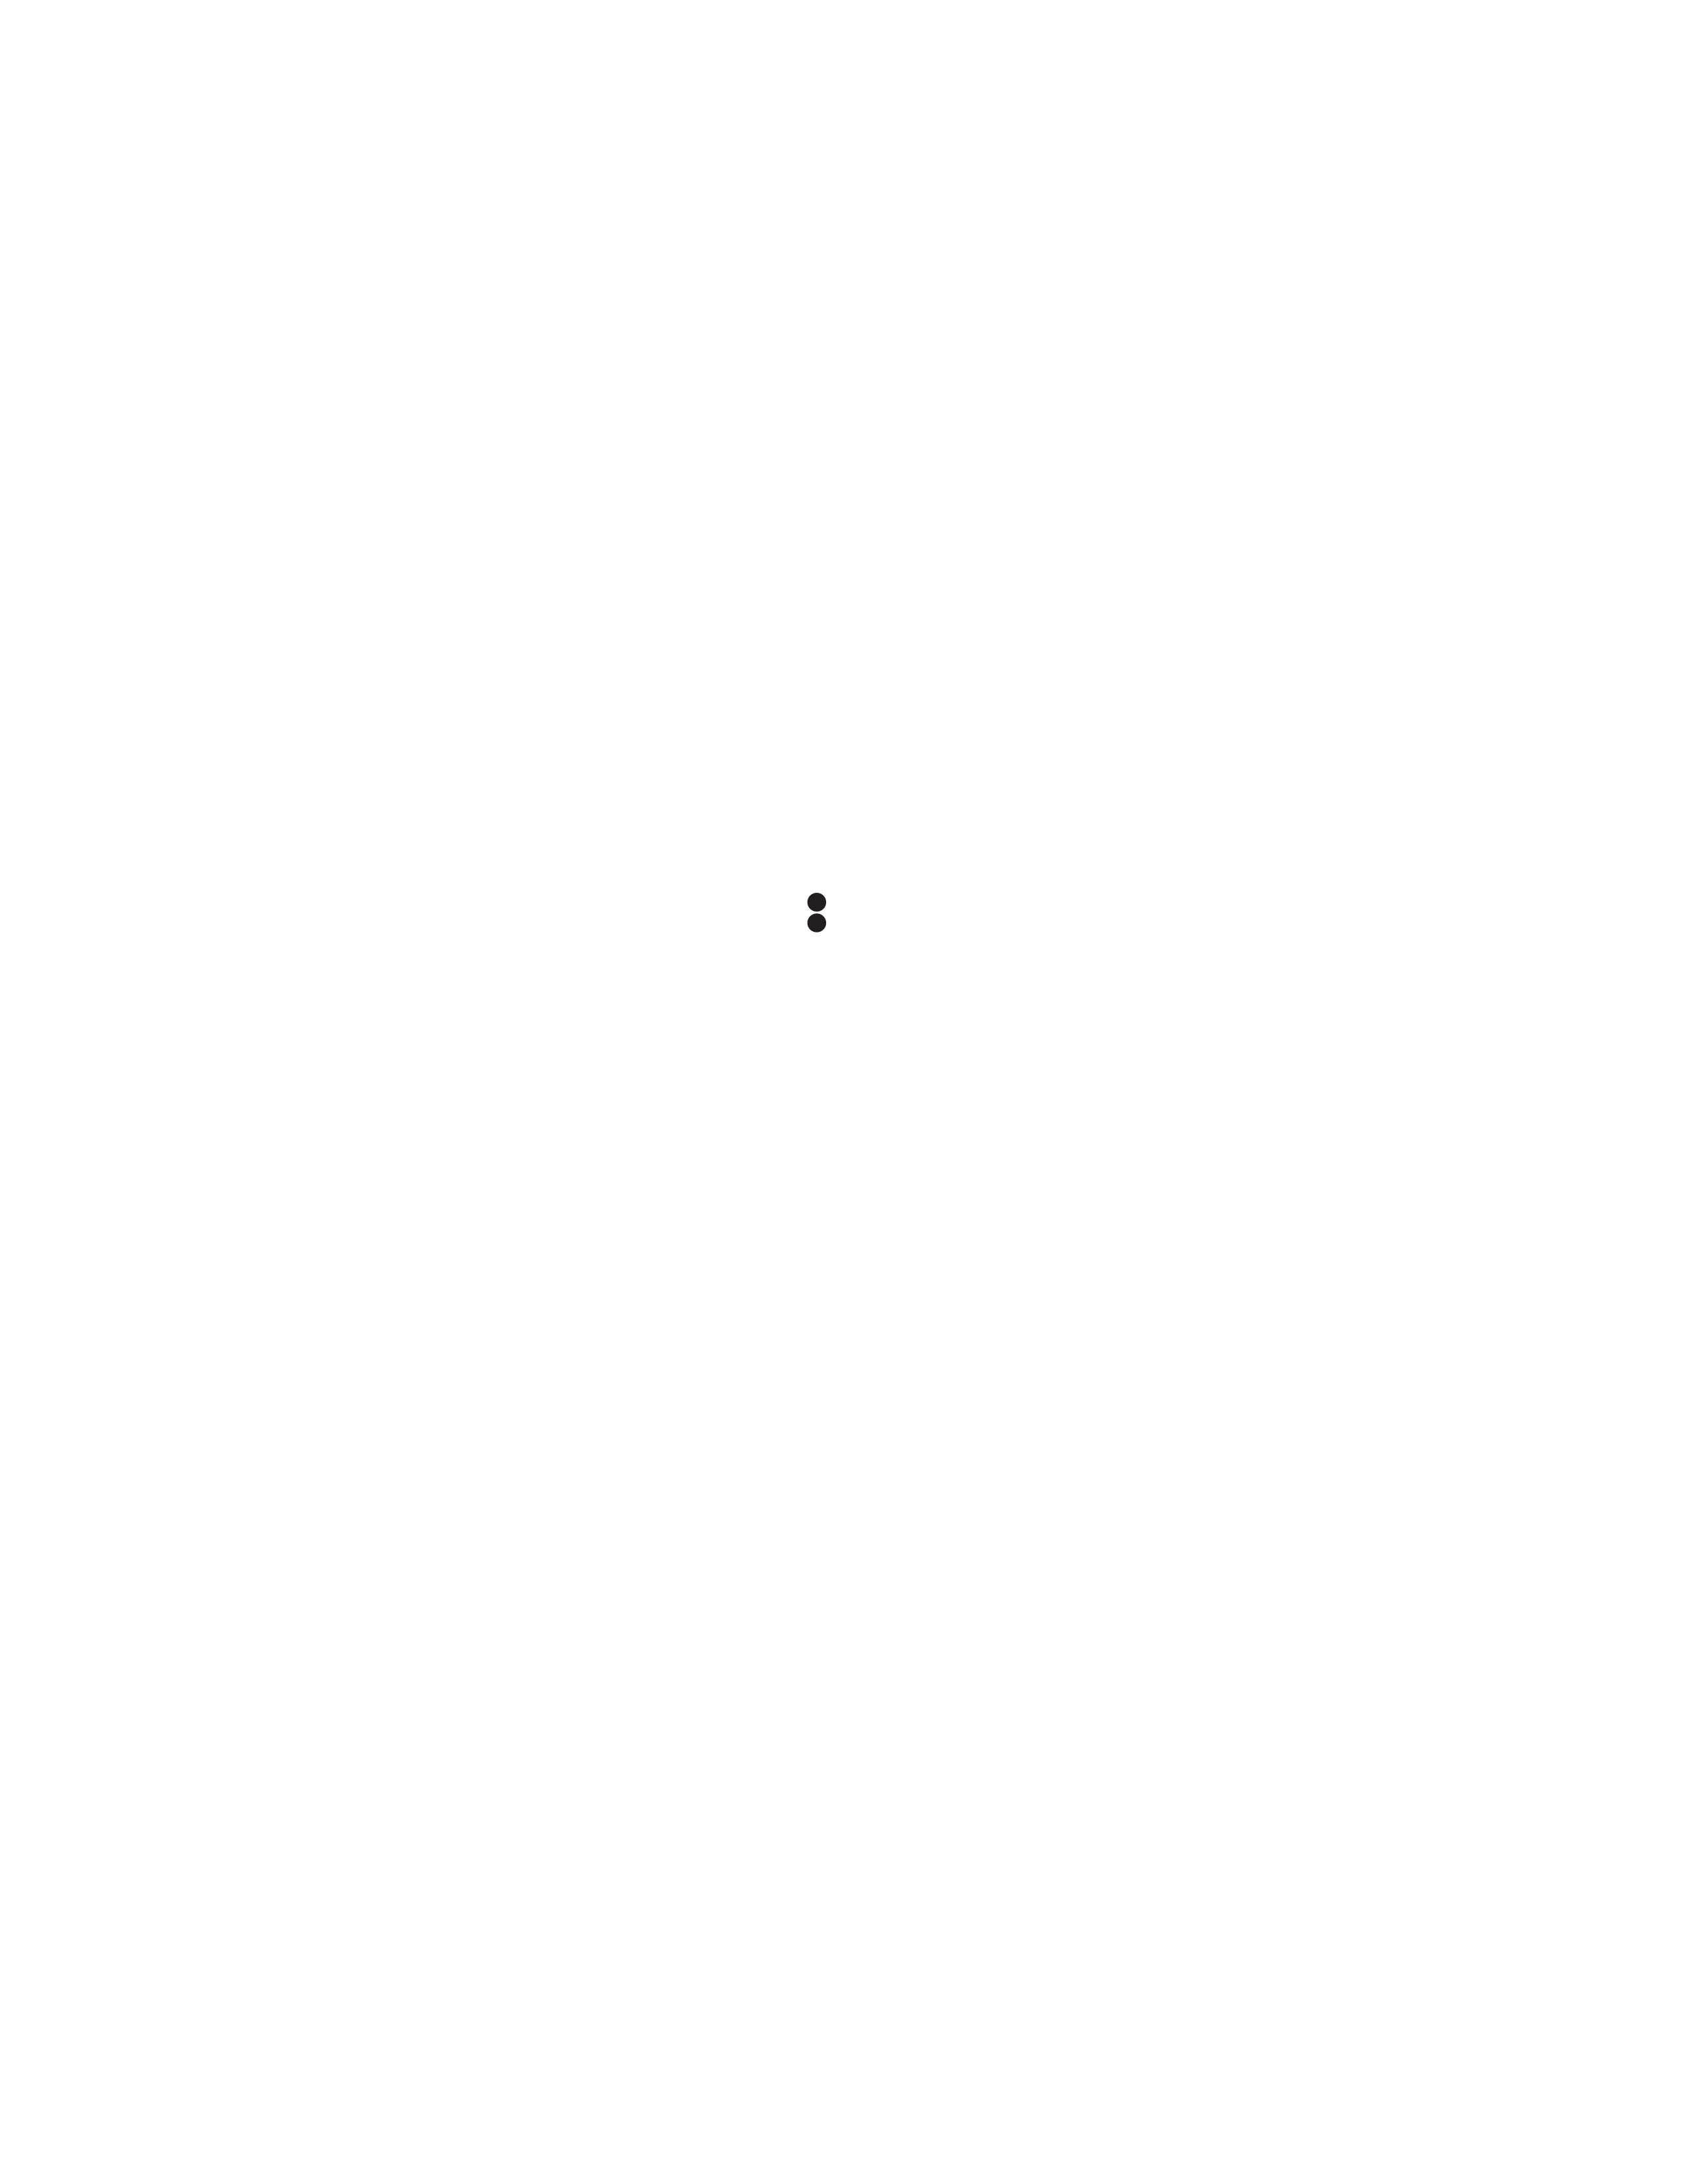

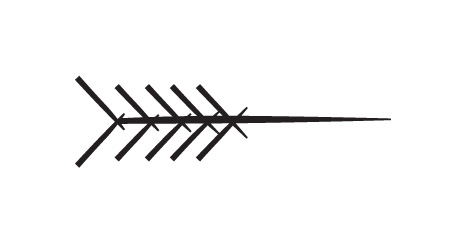

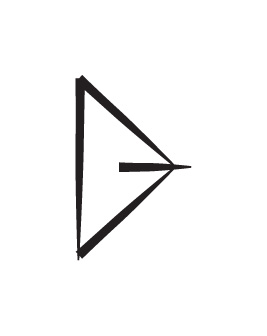

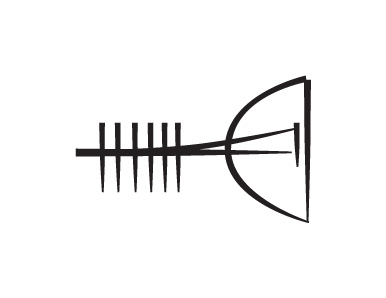

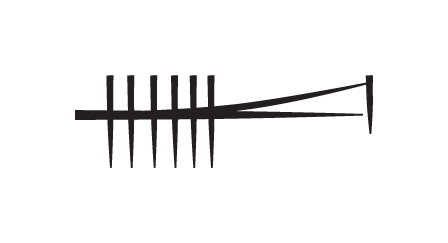

In [19]:
case = CUNEI.nodeFromCase(('P005381', 'obverse:1', '1a'))
#case = [c for c in L.d(line, otype='case') if F.fullNumber.v(c) == '1a'][0]
for ideo in CUNEI.getOuterQuads(case):
    rep = CUNEI.atfFromOuterQuad(ideo)
    display(Image(filename=f'{IDEO_DIR}/{rep}.jpg', width=100))

And here are a photo and a line-art of the tablet as a whole, with case 1.a marked.

<img align="left" src="images/P005381-obverse-photo-1a.png" width="50%"/>
<img align="left" src="images/P005381-obverse-lineart-1a.png" width="50%"/>

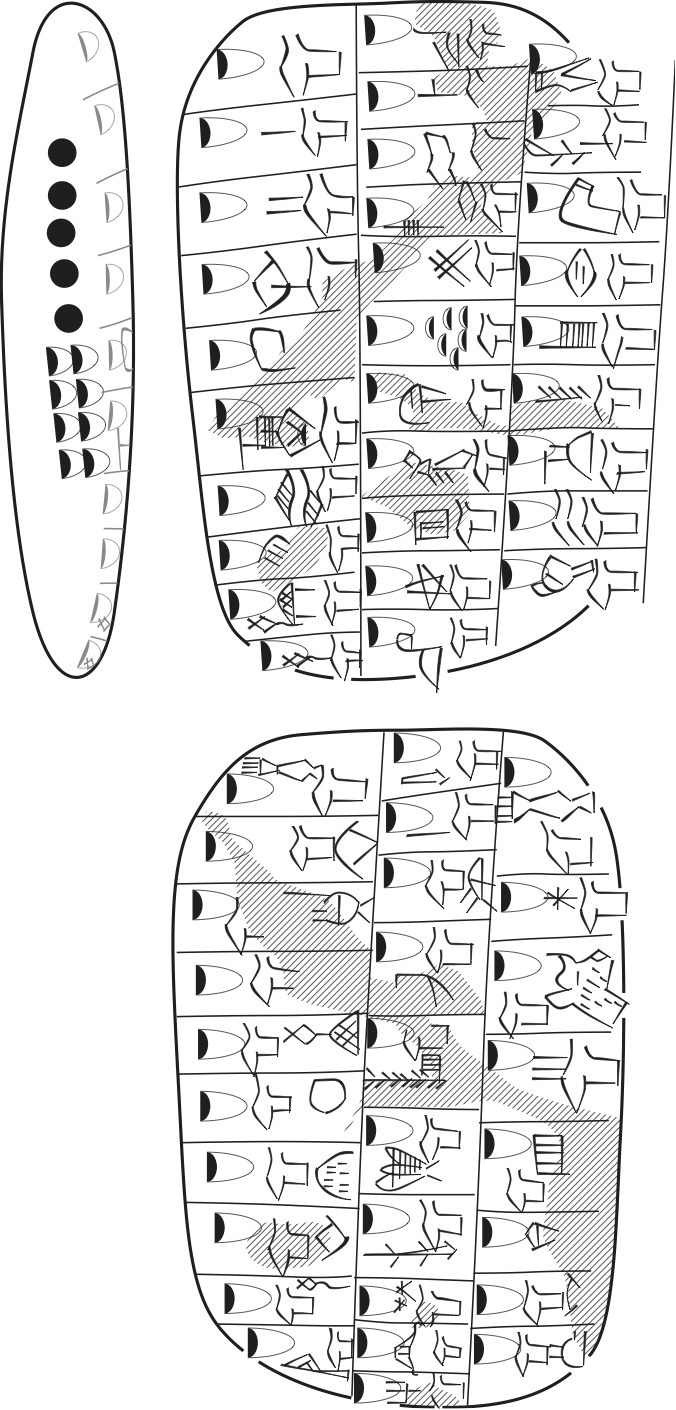

In [35]:
imageFile = f'{TEMP_DIR}/test/P000014_l.png'
display(Image(filename=imageFile, width=100))

In [66]:
imageFile = 'images/P000708_l.pdf'
IFrame(src=imageFile, width=400, height=800)